In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
%matplotlib inline
import utils

import os
from os.path import join as pjoin
import sys
import copy
import random
print(tf.__version__)

c:\users\cemal\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\cemal\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\cemal\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\cemal\appd

1.14.0


In [3]:
down_dir = './../data/train/down'
up_dir = './../data/train/up'
test_dir = './../data/saibeli'
own_test_dir = './../data/own_test'

train_down = ['./../data/train/down/{}'.format(i) for i in os.listdir(down_dir)] # get hands down images
train_up = ['./../data/train/up/{}'.format(i) for i in os.listdir(up_dir)]       # get hands up images

test_imgs = ['./../data/saibeli/{}'.format(i) for i in os.listdir(test_dir)]        # get test images
print(test_imgs)
own_test_imgs = ['./../data/own_test/{}'.format(i) for i in os.listdir(own_test_dir)]        # get own test images

train_imgs = train_down + train_up
random.shuffle(train_imgs)

['./../data/saibeli/down_19148.jpg', './../data/saibeli/down_21024.jpg', './../data/saibeli/down_21757.jpg', './../data/saibeli/down_21774.jpg', './../data/saibeli/down_22086.jpg', './../data/saibeli/down_22130.jpg', './../data/saibeli/down_22192.jpg', './../data/saibeli/down_22221.jpg', './../data/saibeli/down_3480.jpg', './../data/saibeli/down_4249.jpg', './../data/saibeli/down_4253.jpg', './../data/saibeli/down_4294.jpg', './../data/saibeli/down_4301.jpg', './../data/saibeli/down_4302.jpg', './../data/saibeli/down_4437.jpg', './../data/saibeli/down_4470.jpg', './../data/saibeli/down_4489.jpg', './../data/saibeli/down_4491.jpg', './../data/saibeli/down_4647.jpg', './../data/saibeli/down_4670.jpg', './../data/saibeli/down_4675.jpg', './../data/saibeli/down_4995.jpg', './../data/saibeli/down_5013.jpg', './../data/saibeli/down_5017.jpg', './../data/saibeli/down_5019.jpg', './../data/saibeli/down_5024.jpg', './../data/saibeli/down_5026.jpg']


In [4]:
nrows = 150
ncolumns = 150
channels = 3

In [5]:
# A function to read and process the images an acceptable format for our model
# Returns two arrays: X -> resized images, y -> labels
def read_and_process_image(list_of_images):

    x = []
    y = []
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation=cv2.INTER_CUBIC)) # Read the image
        if 'down' in image:
            y.append(1)
        elif 'up' in image:
            y.append(0)
    
    return x,y

In [6]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [7]:

from keras.models import load_model
model = load_model('model_keras.h5')

W1006 12:21:59.045877 11072 deprecation_wrapper.py:119] From c:\users\cemal\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1006 12:21:59.521819 11072 deprecation.py:323] From c:\users\cemal\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1006 12:22:00.388824 11072 deprecation_wrapper.py:119] From c:\users\cemal\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



In [8]:
# Now lets predict on the first 10 Images of the own test set
x_test, y_test = read_and_process_image(test_imgs)
x = np.array(x_test)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
columns=5

[[0.6046177]]
[[0.8874656]]
[[0.5245276]]
[[0.7798736]]
[[0.5553164]]
[[0.678713]]
[[0.51204705]]
[[0.59716153]]
[[0.6174462]]
[[0.6575448]]


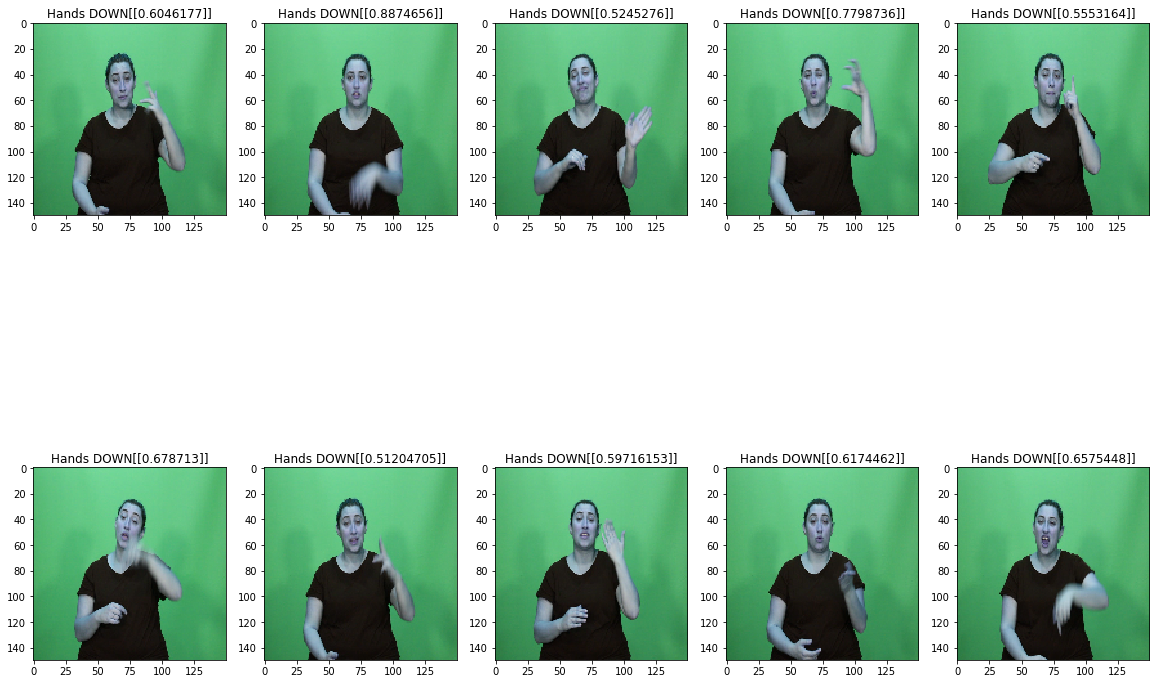

In [10]:
i = 0
text_labels = []
plt.figure(figsize=(20,15))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    print(pred)
    if pred > 0.5:
        text_labels.append('DOWN'+str(pred))
        
    else:
        text_labels.append('UP')
        
    plt.subplot(5/columns+1, columns, i+1)
    plt.title('Hands '+text_labels[i])
    imgplot = plt.imshow(batch[0])
    i+=1
    if i%10 == 0:
        break

plt.show()